In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
import pandas as pd

In [3]:
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [11]:
x=pd.DataFrame(housing.data, columns=housing.feature_names)
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [13]:
y=pd.DataFrame(housing.target,columns=['target'])
y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [15]:
#creating validation train and test set

In [17]:
x_train_full,x_test,y_train_full,y_test=train_test_split(x,y,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,random_state=42)

In [29]:
LAYERS=[
    tf.keras.layers.Input(shape=x_train.shape[1:]),
    tf.keras.layers.Dense(30 , activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1)
]

In [31]:
model=tf.keras.models.Sequential(LAYERS)

In [33]:
LOSS="mse"
OPTIMIZER="sgd"

model.compile(loss=LOSS, optimizer=OPTIMIZER)

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [43]:
EPOCHS=20

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_valid,y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2257 - val_loss: 0.9887
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8203 - val_loss: 0.5338
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5245 - val_loss: 0.4504
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4638 - val_loss: 0.5959
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4091 - val_loss: 0.3824
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3898 - val_loss: 0.3730
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3786 - val_loss: 0.6374
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3620 - val_loss: 0.3398
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3570 - val_loss: 0.3346
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3465 - val_loss: 0.3282
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3451 - val_loss: 0.3261
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

<Axes: >

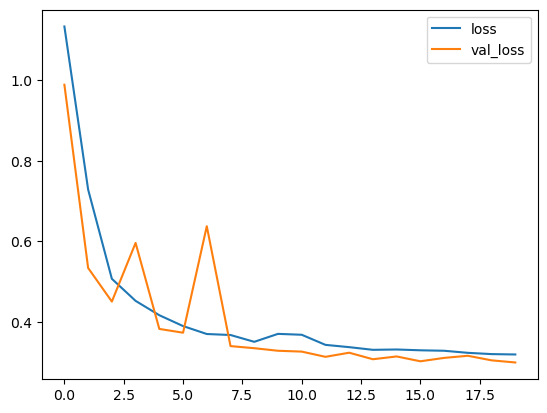

In [45]:
pd.DataFrame(history.history).plot()

In [51]:
model_2=tf.keras.models.Sequential(LAYERS)

LOSS="mse"
OPTIMIZER=tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(loss=LOSS, optimizer=OPTIMIZER)
EPOCHS=100


#defining callbacks
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
tensorboard_cb=tf.keras.callbacks.TensorBoard(log_dir='logs')

CALLBACKS=[checkpoint_cb,early_stopping_cb,tensorboard_cb]

history=model_2.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_valid,y_valid),callbacks=CALLBACKS)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3079

363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.3079 - val_loss: 0.3000
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3006 - val_loss: 0.3099
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2985 - val_loss: 0.3004
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3111

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3111 - val_loss: 0.2979
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3118 - val_loss: 0.3004
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2951 - val_loss: 0.2981
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2926 - val_loss: 0.2995
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2956 - val_loss: 0.3034
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2983 - val_loss: 0.3045


In [53]:
%load_ext tensorboard

In [55]:
%tensorboard --logdir='logs'

In [65]:
model = tf.keras.models.load_model('my_keras_model.h5', custom_objects={'mse': tf.keras.losses.MeanSquaredError()})

In [69]:
predictions = model.predict(x_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [71]:
print(predictions)

[[0.4705758]
 [1.5154881]
 [4.2851872]
 ...
 [1.330461 ]
 [2.0847154]
 [4.1162996]]
